## Group Project

Attached is an Excel spreadsheet, containing 3_month prices of four stocks, A, B, C and D. 

On a full investment base, permitting short-selling and leveraging, by using all the data 
available in the file, carry out the following tasks and show all the working of your 
calculations:

For all calculations:
- Use the sample average return for expected return
- Use the sample covariance for the covariance
- Assume 21 days in each month
- Do not annualise figures


----
members:

21090478

21052150

21137737

21104219

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix, symbols, diff, solve
data = pd.read_excel("Group Project Data.xlsx")
data

,Price Data,Stock A,Stock B,Stock C,Stock D
0,Day 0,6.59,28.55,14.13,6.28
1,Day 1,6.60,28.39,13.96,6.20
2,Day 2,6.50,28.33,13.99,6.20
3,Day 3,6.49,28.31,13.93,6.22
4,Day 4,6.53,28.27,13.94,6.31
...,...,...,...,...,...
2516,Day 2516,74.44,166.28,60.78,46.80
2517,Day 2517,73.72,165.92,61.07,46.39
2518,Day 2518,74.31,166.15,60.99,46.68
2519,Day 2519,73.96,164.14,60.86,46.37


---

## (1) 
**Question:**
Construct the global minimum-variance portfolio with a one-day investment horizon, 
and calculate its expected return and variance. [10 points]


- The optimization problem:

$$
\begin{aligned}
 &\min_w w^T   \Sigma w \\

\\
s.t.&
\{
\begin{array}{c} 
w^T 1_n = 1 
\end{array}


\end{aligned}
$$

- The Lagrange function

$$
\begin{aligned}

L & = w^T\Sigma w - \lambda_1(w^T1_n -1 ) \\

&
\left\{ \begin{array}{l} 
\frac{\partial L}{\partial w} = 2\Sigma w - \lambda_1 1_n = 0......(1)   \\
\\
\frac{\partial L}{\partial \lambda_1} =  w^T1_n -1 = 0 ...............(2)

\end{array}

\right.

\end{aligned}
$$

In [8]:
df = data.copy()

# 2.calculated R; Sigma
df[['Ruturn A','Ruturn B','Ruturn C','Ruturn D']] = df[['Stock A','Stock B','Stock C','Stock D']].apply(lambda x: (x-x.shift(1))/x.shift(1) , axis=0).values
R_daily = df[['Ruturn A','Ruturn B','Ruturn C','Ruturn D']].mean().values 
Sigma_daily = df[['Ruturn A','Ruturn B','Ruturn C','Ruturn D']].cov().values


Corr_daily = df[['Ruturn A','Ruturn B','Ruturn C','Ruturn D']].corr()

# 3.find the minimum-variance portfolio
def solve_mvp(R, Sigma):
    w = Matrix([symbols("w_A"), symbols("w_B"), symbols("w_C"), symbols("w_D")])
    lambda_1 = symbols("lambda_1")
    one_n =  np.ones_like(R)

    L =  ( w.T @ Sigma @ w )[0]  -  ( lambda_1 * (w.T @ one_n  -1) )[0]

    difyL_w = diff(L, w)
    difyL_lambda_1 = diff(L, lambda_1)

    solution = solve([ _ for _ in difyL_w] + [difyL_lambda_1], [ _ for _ in w] + [lambda_1] )
    solution = pd.DataFrame(solution,index=['values']).T

    w_mvp = solution['values'].values[:4]

    # 4. calculated it's return and variance
    return_mvp = float( w_mvp.T @ R )
    variance_mvp = float( w_mvp.T @ Sigma @ w_mvp )

    report_mvp = pd.DataFrame({'values': solution['values'].tolist() + [return_mvp, variance_mvp] },
             index = solution.index.tolist() + ['return_mvp', 'variance_mvp'])

    return(w_mvp, return_mvp, variance_mvp, report_mvp)

w_mvp_daily, return_mvp_daily, variance_mvp_daily, report_mvp_daily = solve_mvp(R_daily, Sigma_daily) 

print(f"Information about the global minimum-variance portfolio with a one-day investment horizon：")
report_mvp_daily


Information about the global minimum-variance portfolio with a one-day investment horizon：


,values
w_A,0.120911046737240
w_B,0.242374549131125
w_C,0.580398591499565
w_D,0.0563158126320695
lambda_1,0.000141583219997400
return_mvp,0.000734
variance_mvp,0.000071


---

## (2) 
**Question:**
Construct the global minimum-variance portfolio with a 3-month investment 
horizon, and calculate its expected return and variance. [10 points

In [9]:
# 1.prepare data
df = data[ np.mod(data.index.values , 3*21 )  == 0 ].copy()

df[['Ruturn A','Ruturn B','Ruturn C','Ruturn D']] = df[['Stock A','Stock B','Stock C','Stock D']].apply(lambda x: (x-x.shift(1))/x.shift(1)  , axis=0).values
R_3_month = df[['Ruturn A','Ruturn B','Ruturn C','Ruturn D']].mean().values 
Sigma_3_month = df[['Ruturn A','Ruturn B','Ruturn C','Ruturn D']].cov().values
# Due the sample size is not very large, make sure to set the ddof=1 to get an unbiased estimation if using numpy to calculate the variance.
# for example, np.std(df['Return A], ddof=1)
Corr_3_month = df[['Ruturn A','Ruturn B','Ruturn C','Ruturn D']].corr()

w_mvp_3_month, return_mvp_3_month, variance_mvp_3_month, report_mvp_3_month = solve_mvp(R_3_month, Sigma_3_month) 


print(f"Information about the global minimum-variance portfolio with a 3-month investment horizon：")
report_mvp_3_month


Information about the global minimum-variance portfolio with a 3-month investment horizon：


,values
w_A,0.112461915911684
w_B,0.0976590218886956
w_C,0.690330135914978
w_D,0.0995489262846419
lambda_1,0.00581050147336406
return_mvp,0.045872
variance_mvp,0.002905


Pay attention please:

Due the sample size is not very large, make sure to set the ddof=1 to get an unbiased estimation if using numpy to calculate the variance.

for example, np.std(df['Return A], ddof=1)

---

## (3) 
**Question:** Discuss why the two portfolios from (1) and (2) are different and what investment 
rationales we could draw from them. [15 points]

**Answer:**

1.The reasons of the differences in the two portfolios:

- (1) Two portfolios has different horizons. And it's obvious that the longer horizon leads to higher variance of the return series. It is also in line with the market commonsence,, for example, compared with daily-horizon, 3-month makes stock absorb more effects from various factors and have a larger change, and thus better capturing abnormal market signals and shock. so the 3-month-horizon global minimum-variance portfolio has a bigger variance and expected return (most of the time) than the daily-horizon one. We can also use the scaling rule to illustrated the logistic:

$$
\sigma^2_{\text{3-month}} = 3 \times 21 \sigma^2_{\text{daily}} 
$$

- (2) Sampling error and noisy also contribute to the differences. In other words, most of the time, we can find tiny differences between the term $3 \times 21 \hat \sigma^2_{\text{daily}}$ and the term $\hat \sigma^2_{\text{3-month}}$



2.Investment rationales:

- (1) The longer horizon, the higher change of return and the higher risk.  

- (2) Choose the horizon carefully When researching the market or investment strategy.The horizon needs to comply with the request for proposal (RFP). For example, if the RFP wants to make profit by capture short-term & high-frequency anomalies, then we need to choose daily hoziron (or even shorter).


---

## (4) 
**Question:** By using the same variance/covariance matrices used in (1) and (2) above, calculate 
the variance and volatility of an equally weighted portfolio, i.e. each asset has a 25% 
weight, for 1-day and 3-month investment horizons. [10 points]

In [10]:
w_equal = np.ones_like(R_daily)/4

virance_equal_daily = w_equal.T @ Sigma_daily @ w_equal

virance_equal_3_month = w_equal.T @ Sigma_3_month @ w_equal

print(f"Information about the equally weighted portfolios' variance：")
pd.DataFrame({
    "values": [virance_equal_daily, virance_equal_3_month]
}, index=["virance_equal_daily", "virance_equal_3_month"])

Information about the equally weighted portfolios' variance：


,values
virance_equal_daily,0.000094
virance_equal_3_month,0.004987


---

## (5) 
**Question:** By using the scaling rule (i.e. the h-day variance is h times the 1-day variance), 
estimate the 3-month variance from the 1-day variance found in (4). [10 points]

In [11]:
virance_equal_3_month_scaling = 21 *3 * virance_equal_daily

print(f"Information about the equally weighted portfolios' variance and the scaling variance:")
pd.DataFrame({
    "values": [virance_equal_daily, virance_equal_3_month, virance_equal_3_month_scaling]
}, index=["virance_equal_daily", "virance_equal_3_month", "virance_equal_3_month_scaling"])

Information about the equally weighted portfolios' variance and the scaling variance:


,values
virance_equal_daily,0.000094
virance_equal_3_month,0.004987
virance_equal_3_month_scaling,0.005910


---

## (6)  
**Question:** Compare the two 3-month variance figures from (4) and (5) and discuss what might 
have caused the differences. [15 points]


**Answer:**

1.we can find tiny differences between the term $3 \times 21 \hat \sigma^2_{\text{daily}}$ (which is 0.005934) and the term $\hat \sigma^2_{\text{3-month}}$ (which is 0.004717)


2.The reasons for causing the differences:

    (1) Sampling error and noisy contribute to the differences:
        Sampling error and noisy affect the estimation of the variance and then cause tiny differences. 


    (2) The reality does not satisfy the assumptions of the scaling rule: 

         The scaling rule have some assumptions, but these assumptions are difficult to realized in reality. For example, the assumptions require the return series meet the iid condition. But in reality, the return series is often autocorrelated, and the volatility is clustered and asymmetric. All of these cause the fail of the scaling rule.
    

    (3) The bias of square root of scaling rule: 

        The square root of time rule leads to a systematic underestimation of risk, which worsens with increasing time horizon, jump intensity and confidence level.

    (4) Ohter:
    
        Scaling is used to change the type of our data measurement, thus in our case from daily to monthly. When a random variable is scaled, the scale factor on the variance is going to change quadratically. Outliers are affecting the variance as when we square large deviations, we obtain huge variances. Therefore, when we scale our data by any number that is greater than one the outliers will spread implying that it will also impact the variance.


- reference: On time-scaling of risk and the square–root–of–time rule ( https://eprints.lse.ac.uk/24827/1/dp439.pdf )


---

## (7) 
**Question:** Using the covariance from the 3-month calculations above in (2), find 10 minimumvariance portfolios whose expected return should meet or exceed an arbitrary target 
level of return R. R will range from the expected return estimated from (2) to the 
largest estimated 3-month return from the 4 stocks, with equal intervals between 
them. For instance, if the 3-month global minimum variance portfolio’s expected 
return was 0.02 and the largest 3-month stock return was 0.11, R=(0.02, 0.03,…, 
0.11). Estimate the volatility of each of the 10 portfolios. [15 points]



- The optimization problem:

$$
\begin{aligned}
 &\min_w w^T   \Sigma w \\

\\
s.t.&
\{
\begin{array}{c} 
w^T R = R_{\Pi} \\
w^T 1_n = 1 
\end{array}


\end{aligned}
$$ 

- Solve the problem (Find the effective frontier)

$$
\begin{aligned}
L & = w^T\Sigma w - \lambda_1(w^T1_n -1 ) - \lambda_2(w^TR-R_{\Pi})  \\

\\
&
\left\{\begin{array}{l} 
\frac{\partial L}{\partial w} = 2\Sigma w - \lambda_1 1_n - \lambda_2 R = 0......(1)   \\
\\

\frac{\partial L}{\partial \lambda_2} = w^TR-R_{\Pi} =0    ............(2)\\ 
\\

\frac{\partial L}{\partial \lambda_1} =  w^T1_n -1 = 0 ...............(3)

\end{array}
\right. \\

\end{aligned}
$$


- Actually, we can get the close solution by solving the optimization problem,shown as the following:

$$
\begin{aligned}


\text{Substitute } & \text{equation (1) into (2) (3) } \\
& w  = \frac{1}{2}\Sigma^{-1} (\lambda_1R+\lambda_2 1_n)\\

&
\left\{\begin{array}{l}
R_{\Pi}=\frac{1}{2}\left(\lambda_{1} R^{T} \Sigma^{-1} R+\lambda_{2} 1_{n}^{T} \Sigma^{-1} R\right) \\
1=\frac{1}{2}\left(\lambda_{1} R^{T} \Sigma^{-1} 1_{n}+\lambda_{2} 1_{n}^{T} \Sigma^{-1} 1_{n}\right)
\end{array}\right.
\\

&
\text{which can be rewrited as following: }
\\
&
\begin{aligned}

\left[\begin{array}{c}
R_{\Pi} \\
1
\end{array}\right]=\frac{1}{2} \cdot\left[\begin{array}{cc}
R^{T} \Sigma^{-1} R & 1_{n}^{T} \Sigma^{-1} R \\
R^{T} \Sigma^{-1} 1_{n} & 1_{n}^{T}{\Sigma}^{-1} 1_{n}
\end{array}\right]\left[\begin{array}{l}
\lambda_{1} \\
\lambda_{2}
\end{array}\right] ....(4)

\end{aligned}

\\
\\
\text{Substitute} & \text{ equation (1) into } w^T\Sigma w \\


&
\begin{aligned}
w^T\Sigma w 
&= \frac{1}{4}\left(\lambda_{1} R^{T} \Sigma^{-1}+\lambda_{2} 1_{n}^{T} \Sigma^{-1}\right) \cdot \Sigma \Sigma^{-1}\left(\lambda_{1} R+\lambda_{2} 1_{n}\right) \\
&=\frac{1}{4}\left(\lambda_{1}{ }^{2} R^{T} \Sigma^{-1} R+2 \lambda_{1} \lambda_{2} R^{T} \Sigma^{-1} 1_{n}+\lambda_{2}{ }^{2} 1_{n}^{T} \Sigma^{-1} 1_{n}\right) \\
&=\frac{1}{4}\left[\begin{array}{ll}
\lambda_{1} & \lambda_{2}
\end{array}\right]\left[\begin{array}{ll}
R^{T} \Sigma^{-1} R & R^{T} \Sigma^{-1} 1_{n} \\
R^{T} \Sigma^{-1} 1_{n} & 1_{n}^{T} \Sigma^{-1} 1_{n}
\end{array}\right]\left[\begin{array}{l}
\lambda_{1} \\
\lambda_{2}
\end{array}\right] .....(5) \\
\end{aligned}

\end{aligned}
$$



- - solve $\lambda_1 , \lambda_2$ from (4), and then substitute the solution into (5):

$$
\begin{aligned}
\sigma_{\Pi}^2 = & \left[\begin{array}{ll}
R_{\Pi} & 1
\end{array}\right]\left[\begin{array}{cc}
R^{T} \Sigma^{-1} R & 1_{n}^{T} \Sigma^{-1} R \\
R^{T} \Sigma^{-1} 1_{n} & 1_{n}^{T} \Sigma^{-1} 1_{n}
\end{array}\right]^{-1}\left[\begin{array}{cc}
R^{T} \Sigma^{-1} R & R^{T} \Sigma^{-1} 1_{n} \\
R^{T} \Sigma^{-1} 1_{n} & 1_{n}^{T} \Sigma^{-1} 1_{n}
\end{array}\right]


\left[\begin{array}{cc}
R^{T} \Sigma^{-1} R & 1_{n}^{T} \Sigma^{-1} R \\
R^{T} \Sigma^{-1} 1_{n} & 1_{n}^{T} \Sigma^{-1} 1_{n}
\end{array}\right]^{-1} 
\left[\begin{array}{c}
R_{\Pi} \\
1
\end{array}\right]
\\


= &  \left[\begin{array}{ll} R_{\Pi} & 1 \end{array}\right] 
\left[\begin{array}{cc}
R^{T} \Sigma^{-1} R & 1_{n}^{T} \Sigma^{-1} R \\
R^{T} \Sigma^{-1} 1_{n} & 1_{n}^{T} \Sigma^{-1} 1_{n}
\end{array}\right]^{-1} 
\left[\begin{array}{c} R_{\Pi} \\ 1 \end{array}\right] 

\\
= &\left[\begin{array}{ll} R_{\Pi} & 1 \end{array}\right] 
\left[\begin{array}{cc}
a & b  \\
b & c
\end{array}\right]^{-1} 
\left[\begin{array}{c} R_{\Pi} \\ 1 \end{array}\right] 

\\
= & \frac{cR_{\Pi}^2 - 2bR_{\Pi} +a}{ac-b^2}

\end{aligned}

$$

 - - solve $\lambda_1 , \lambda_2$ from (4), and then substitute the solution into $w  = \frac{1}{2}\Sigma^{-1} (\lambda_1R+\lambda_2 1_n)$:

$$
\begin{aligned}
w = &  \Sigma^{-1} 
\left[\begin{array}{c}
 R  &
 1_n
\end{array}\right] 

\left[\begin{array}{c}
a & b \\ b & c
\end{array}\right]^{-1} 


\left[\begin{array}{c}
R_{\Pi} \\
1
\end{array}\right]
\end{aligned}
$$

- - In the coding part, we will use optimization package (sympy) to cauculate the solution. And then calculate close solution for verification. 


In [68]:
Sigma_3_month

df_frontier = pd.DataFrame({
    "return_arbitary": np.linspace(return_mvp_3_month , R_3_month.max(), 10 )
})

def solve_effetive_frontier(R, Sigma, R_pi):
    w = Matrix([symbols("w_A"), symbols("w_B"), symbols("w_C"), symbols("w_D")])
    lambda_1 = symbols("lambda_1")
    lambda_2 = symbols("lambda_2")
    one_n =  np.ones_like(R)

    L =  ( w.T @ Sigma @ w )[0]  -  ( lambda_1 * (w.T @ one_n  -1) )[0] - ( lambda_2 * (w.T @ R  -R_pi) )[0]

    difyL_w = diff(L, w)
    difyL_lambda_1 = diff(L, lambda_1)
    difyL_lambda_2 = diff(L, lambda_2)

    solution = solve([ _ for _ in difyL_w] + [difyL_lambda_1, difyL_lambda_2], [ _ for _ in w] + [lambda_1, lambda_2] )
    solution = pd.DataFrame(solution,index=['values']).T

    w_frontier = solution['values'].values[:4]

    # 4. calculated it's return and variance
    return_frontier = w_frontier.T @ R
    variance_frontier = w_frontier.T @ Sigma @ w_frontier

    report_frontier = pd.DataFrame({'values': solution['values'].tolist() + [return_frontier, variance_frontier] },
             index = solution.index.tolist() + ['return_frontier', 'variance_frontier'])

    return(w_frontier, float(return_frontier), float(variance_frontier), report_frontier)



def f(r_pi):
    w, r, v, report = solve_effetive_frontier(R_3_month, Sigma_3_month, r_pi)
    return(pd.Series({ 
        "return_arbitary": r_pi, 
        "return_frontier": r,
        "virance_frontier": v,
        "volatility_frontier": np.sqrt(v),
        "w_A": w[0],
        "w_B": w[1],
        "w_C": w[2],
        "w_D": w[3]
    }))

report_frontier = df_frontier['return_arbitary'].apply( f )

print(f"Information about the effective frontie (calculated by the sympy package):")
report_frontier


Information about the effective frontie (calculated by the sympy package):


,return_arbitary,return_frontier,virance_frontier,volatility_frontier,w_A,w_B,w_C,w_D
0,0.045872,0.045872,0.002905,0.053900,0.112461915911685,0.0976590218886954,0.690330135914977,0.0995489262846425
1,0.049003,0.049003,0.003108,0.055752,0.181180629306499,0.0715055203493475,0.600065708035283,0.147248142308871
2,0.052134,0.052134,0.003717,0.060971,0.249899342701313,0.0453520188099996,0.509801280155588,0.194947358333099
3,0.055264,0.055264,0.004733,0.068795,0.318618056096130,0.0191985172706508,0.419536852275891,0.242646574357328
4,0.058395,0.058395,0.006154,0.078449,0.387336769490944,-0.00695498426869708,0.329272424396196,0.290345790381557
5,0.061526,0.061526,0.007982,0.089341,0.456055482885758,-0.0331084858080450,0.239007996516502,0.338045006405785
6,0.064657,0.064657,0.010215,0.101071,0.524774196280575,-0.0592619873473937,0.148743568636804,0.385744222430014
7,0.067788,0.067788,0.012855,0.113381,0.593492909675389,-0.0854154888867416,0.0584791407571098,0.433443438454243
8,0.070919,0.070919,0.015901,0.126100,0.662211623070203,-0.111568990426090,-0.0317852871225847,0.481142654478471
9,0.074049,0.074049,0.019353,0.139115,0.730930336465020,-0.137722491965438,-0.122049715002282,0.528841870502701


In [67]:
def calculate_effective_frontier_close_solution(R, R_pi, Sigma):
    Sigma_inv = np.linalg.inv(Sigma)
    one = np.ones_like(R)
    a = R.T @ Sigma_inv @ R
    b = one.T @ Sigma_inv @ R
    c = one.T @ Sigma_inv @ one
    
    # calculate sigma_pi^2
    matrix_1 = np.array( [R_pi, 1] )
    matrix_2 = np.array([ [a, b], [b, c] ])
    matrix_2_inv = np.linalg.inv(matrix_2)
    variance_pi = matrix_1.T @ matrix_2_inv @ matrix_1


    # calculate w
    w = Sigma_inv @ np.c_[R, one] @ matrix_2_inv @ matrix_1
    
    #variance_pi = w.T @ Sigma @ w
    return(w, w.T @ R, variance_pi)

def g(r_pi):
    w, r, v = calculate_effective_frontier_close_solution(R_3_month, r_pi, Sigma_3_month)
    return(pd.Series({ 
        "return_arbitary": r_pi, 
        "return_frontier": r,
        "virance_frontier": v,
        "volatility_frontier": np.sqrt(v),
        "w_A": w[0],
        "w_B": w[1],
        "w_C": w[2],
        "w_D": w[3],
        'sum_w': w.sum()
    }))

report_frontier_verification = df_frontier['return_arbitary'].apply( g )
print(f"Information about the effective frontier (calculated by the close solution):")
report_frontier_verification

Information about the effective frontier (calculated by the close solution):


,return_arbitary,return_frontier,virance_frontier,volatility_frontier,w_A,w_B,w_C,w_D,sum_w
0,0.045872,0.045872,0.002905,0.053900,0.112462,0.097659,0.690330,0.099549,1.0
1,0.049003,0.049003,0.003108,0.055752,0.181181,0.071506,0.600066,0.147248,1.0
2,0.052134,0.052134,0.003717,0.060971,0.249899,0.045352,0.509801,0.194947,1.0
3,0.055264,0.055264,0.004733,0.068795,0.318618,0.019199,0.419537,0.242647,1.0
4,0.058395,0.058395,0.006154,0.078449,0.387337,-0.006955,0.329272,0.290346,1.0
5,0.061526,0.061526,0.007982,0.089341,0.456055,-0.033108,0.239008,0.338045,1.0
6,0.064657,0.064657,0.010215,0.101071,0.524774,-0.059262,0.148744,0.385744,1.0
7,0.067788,0.067788,0.012855,0.113381,0.593493,-0.085415,0.058479,0.433443,1.0
8,0.070919,0.070919,0.015901,0.126100,0.662212,-0.111569,-0.031785,0.481143,1.0
9,0.074049,0.074049,0.019353,0.139115,0.730930,-0.137722,-0.122050,0.528842,1.0


---

## (8) 
**Question:** Plot return vs volatility of the 10 portfolios from (7), of the global minimum-variance 
portfolio from (2), and of the 4 stocks, and discuss why you may generally not want 
to hold single-stock portfolios, other than perhaps one of the 4 stocks. If so, which 
one and why? [15 points]

Information about the points in the scatter chart:


,return,variance,color,style,volatility
0,0.045872,0.002905,mvp,mvp,0.053900
1,0.045872,0.002905,effective frontier,effective frontier,0.053900
2,0.049003,0.003108,effective frontier,effective frontier,0.055752
3,0.052134,0.003717,effective frontier,effective frontier,0.060971
4,0.055264,0.004733,effective frontier,effective frontier,0.068795
5,0.058395,0.006154,effective frontier,effective frontier,0.078449
6,0.061526,0.007982,effective frontier,effective frontier,0.089341
7,0.064657,0.010215,effective frontier,effective frontier,0.101071
8,0.067788,0.012855,effective frontier,effective frontier,0.113381
9,0.070919,0.015901,effective frontier,effective frontier,0.126100


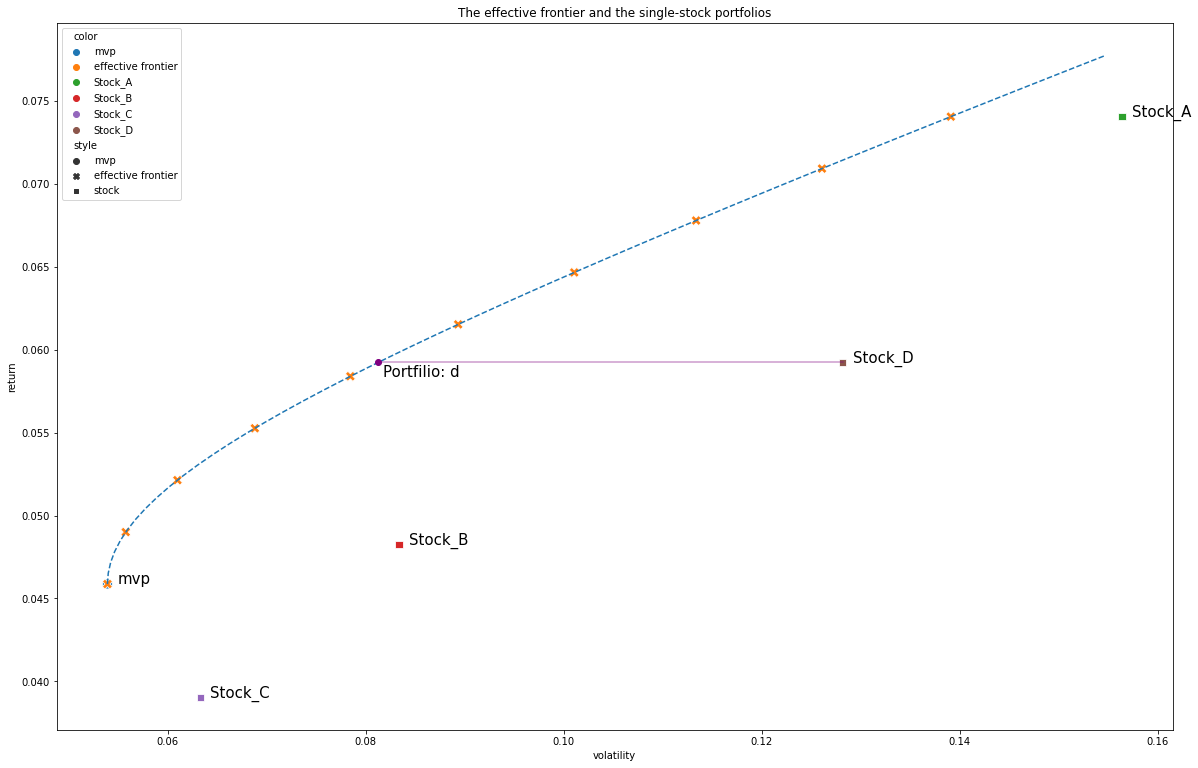

In [144]:
# prepare data for plotting
df_plot_3_month = pd.DataFrame({
    "return": [ report_mvp_3_month.loc['return_mvp','values'] ] + report_frontier['return_frontier'].tolist() + R_3_month.tolist(), 
    "variance": [ report_mvp_3_month.loc['variance_mvp','values'] ] + report_frontier['virance_frontier'].tolist() + np.diag(Sigma_3_month).tolist(),
    "color": ["mvp"] + ["effective frontier"] * report_frontier.shape[0] + ['Stock_A','Stock_B','Stock_C','Stock_D'],
    "style": ["mvp"] + ["effective frontier"] * report_frontier.shape[0] + ["stock"] * 4
})
df_plot_3_month['volatility'] = df_plot_3_month['variance'].apply(np.sqrt) 

# plot the single-stock portfolios and the effective frontier (10 points)
plt.figure(figsize=(20,13))
sns.scatterplot(x=df_plot_3_month['volatility'], y=df_plot_3_month['return'], 
                s=100,
                hue=df_plot_3_month['color'], 
                style= df_plot_3_month['style'], 
                alpha=1)
plt.title("The effective frontier and the single-stock portfolios")

# add text for points
df_plot_3_month[df_plot_3_month['style']!='effective frontier'].apply(lambda x: plt.annotate(
                                                                        x['color'], 
                                                                        xy=(x['volatility'],x['return']),
                                                                        xytext=(+10,+0),
                                                                        fontsize=15,
                                                                        textcoords='offset points'), axis=1 )

# plot the effective frontier curve:
y = np.linspace(report_frontier['return_frontier'].min(), report_frontier['return_frontier'].max() * 105/100, 50)
x = pd.Series(y).apply(lambda _: calculate_effective_frontier_close_solution(R_3_month, _, Sigma_3_month)[2])
x = np.sqrt(x).values
plt.plot(x, y, "--")


# plot a hline
y_2 = df_plot_3_month[df_plot_3_month["color"]=="Stock_D"]["return"].values[0]
x_1 = np.sqrt( calculate_effective_frontier_close_solution(R_3_month, y_2, Sigma_3_month)[2] )
x_2 = df_plot_3_month[df_plot_3_month["color"]=="Stock_D"]["volatility"].values[0]

plt.plot( [x_1, x_2], [y_2, y_2], "purple", alpha =0.4)
plt.plot( [x_1], [y_2], color="purple", marker="o")
plt.annotate("Portfilio: d", 
             xy=( x_1, y_2 ),
             xytext=(+5,-15),
             fontsize=15,
             textcoords='offset points')


print(f"Information about the points in the scatter chart:")
df_plot_3_month

# df_plot_3_month.plot.scatter(y='return', x='volatility', c='group', figsize=(15,10))

From the graph above, it’s obvious to see that the scatter plot is a sketch of the efficient frontier. The single stock portfolios have higher risk than diversified portfolio which has the same return as the single stock.

In other words, investors may lose **the benefits of diversification** if they hold single-stock portfolios. More precisely, through diversification, the specific risk is diversified away and only the systematic risk remains. Thus, in order to obtain the maximum benefits of diversification, investors should not buy single-stock portfolios. 

And, we can use the effective frontier to illustrate the diversification benefits. For example, as shown in the efficient frontier, stock D is the stock that is very far from the efficient frontier. And we can find a portfolio d on the effective frontier, which has the same return as D but has a lower risk.